[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t5_clustering_master.ipynb)


# Descriptive Analytics Using Clustering

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creating synthetic data for clustering

### Sampling from Gaussian distribution 
We use the function `make_blobs()` from the `sklearn.datasets` module to create synthetic data in 2D for clustering. You can set the number of clusters via the argument `centers`. Also, you can configure the function such that it returns the locations of the cluster centers. This will be useful for later comparisons. Thus, make use of this feature by setting `return_centers=True`.

Generate 50 data points and chart these in a scatter plot.

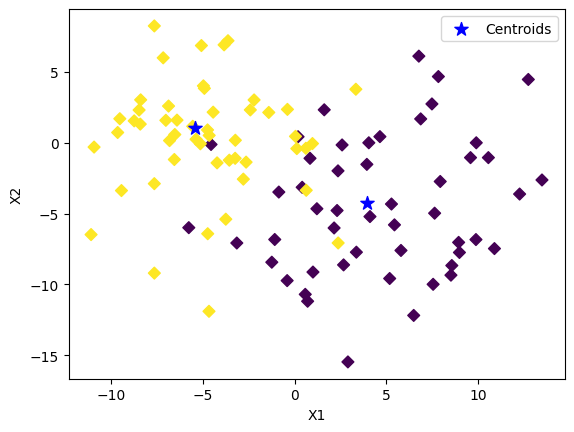

Coordinates of the cluster centers:
[[ 3.92938371 -4.2772133 ]
 [-5.46297093  1.02629538]]


In [59]:
from sklearn.datasets import make_blobs
# Generate the data
X, cluster_assignment, centers = make_blobs(n_samples=100,
                                            n_features=2, 
                                            centers=2,
                                            cluster_std=4,
                                            return_centers=True, 
                                            random_state=123)
# Plot the data
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_assignment, marker='D')
plt.scatter(x=centers[:,0], y=centers[:,1], c='blue', marker='*', s=100, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.show()
print('Coordinates of the cluster centers:')
print(centers)

### The multivariate normal distribution

For better understanding of the `make_blobs()` function, we following code creates a 2D surface plot of the bi-variate normal distribution. First, we defineh`

This code first defines a multivariate normal distribution with a mean of `[0.0, 0.0]` and a covariance matrix of


Next, we  0.0],[0.0, 1.0]]`. It then creates a grid of points at which using the function `meshgrid()`. Then, we o evaluae the distribution, evaluates thedistribution at theethepoints, and f.i

 surface plot of the result. You can adjust the mean and covariance matrix to change the shape of th()e distribution. The `linspace` function is used to create the gr()id of points, and the `dstack` function is used to combine the x and y coordinates into a single array. The `multivariate_normal` function is used to create the distribution, and the `pdf` method is used to evaluate the distribution at the grid points. The `plot_surface` function is used to create the surface plot. The `show` function is used to display the plot. Please make sure you have the necessary libraries installed in your Python environment. Y if neededou can install them using pip:

```bash
pip install numpy matplotlib scipy
```

In [ ]:
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for the distribution
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.0], [0.0, 1.0]])

# Create a grid of points at which to evaluate the distribution
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
pos = np.dstack((X1, X2))

# Create the multivariate normal distribution and evaluate it at the grid points
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Create the surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Probability density', labelpad=1)
plt.tight_layout()
plt.title('Bi-Variate Normal Distribution')
plt.show()

## Clustering using kMeans

### Sci-Kit learn implementation of the kMeans algorithm
The following code, which is copied from the [sklearn documentation of `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) exemplifies how you can perform kMeans-based clustering. It illustrates all relevant functions. Try to adjust the code to cluster our synthetically created data.

```Python
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])  # Create artificial data
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)  # run the cluster algorithm
print(kmeans.labels_)  # print the assignment of data points to clusters
print(kmeans.predict([[0, 0], [12, 3]]))  # find the cluster of a novel data point
print(kmeans.cluster_centers_)  # print the location of the cluster centroids
print(kmeans.inertia_)  # print value of the objective function
```

In [61]:
# Cluster synthetic data created by make_blobs
from sklearn.cluster import KMeans
k=2
kmeans = KMeans(n_clusters=k, random_state=123, n_init="auto").fit(X)

Make sure to execute the following code before moving on. We need this function to enhance our below visualization of the kMeans solution.


In [52]:
from sklearn.metrics import confusion_matrix
def relabel_clusters(y_true, y_pred):
    ''' The way in which make_blobs() labels clusters is arbitrary.
    Likewise, kMeans labels clusters in arbitrary order. Thus, it can
    happen that the index of clusters will differ between the kMeans
    solutions and the true cluster assignment based on make_blobs().
    To overcome this problem, this helper function checks whether the 
    kMeans cluster assignment seems plausible and reverts it otherwise.

    Input: y_true - true cluster menbership of a data point. 
                    This should be an output of make_blobs.
                    
           y_pred - estimated cluster membership. This should be
                    the output of kMeans clustering.
    '''
    cm = confusion_matrix(y_true, y_pred)  # create a cross-table of true and predicted cluster assignments
    if np.sum(np.diag(cm)) < np.sum(cm) / 2:  # check if the sum of the diagonal elements is less than half of the total sum of the matrix
        y_pred = 1 - y_pred
    return y_pred


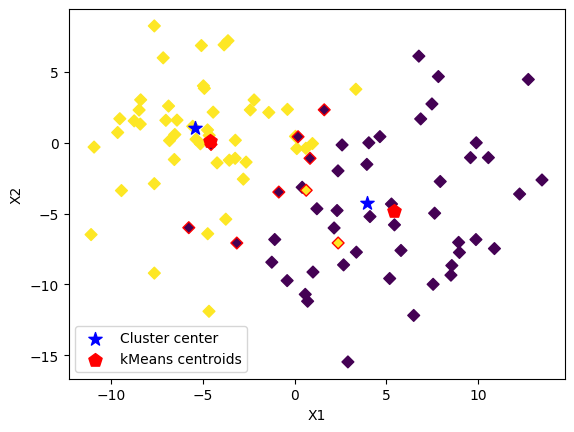

In [62]:
# define an index for the data points that were put into the right cluster
idx = cluster_assignment == relabel_clusters(cluster_assignment, kmeans.labels_)  # the helper function relabel_clusters ensures the numbering of clusters in make_blobs and kMeans is the same

# plot the data points that were clustered correctly
plt.scatter(X[idx, 0],  X[idx, 1],  c=cluster_assignment[idx] , marker='D')

# next plot the data points that kMeans put into a wrong cluster and 
# highlight by a red border
plt.scatter(X[~idx, 0], X[~idx, 1], c=cluster_assignment[~idx], marker='D', edgecolor='red', linewidths=1)

# plot the true cluster centers
plt.scatter(x=centers[:,0], y=centers[:,1], c='blue', marker='*', s=100, label='Cluster center')

# plot the kMeans centroids
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='red', marker='p', s=100, label='kMeans centroids')

# configure the plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.show()

### Elbow method to determine K

The lecture introduced you to the elbow method for determining the number of clusters. Write code to try it out. Having full control over our data, we would expert a nice curve like the one below.

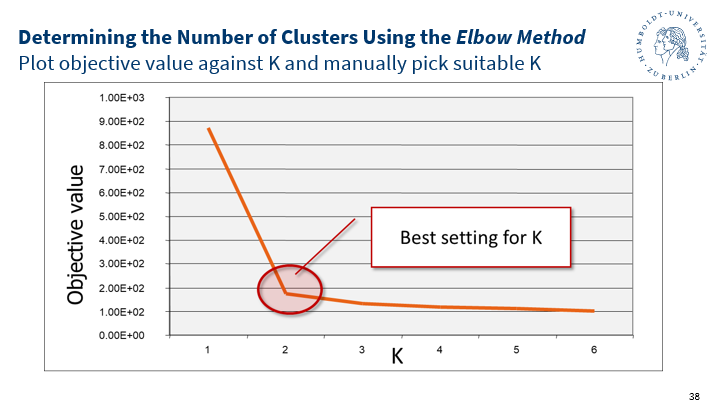

Once you created a similar plot for the synthetic data, go back to the `make_blobs()` method and adjust its arguments to examine different types of data and their clustering. For example, examine how the elbow plot changes if you create data with three cluster centers, and examine how it changes if you create overlapping clusters. To achieve this, you can use the argument `cluster_std`, which the function provides.  

In [ ]:
# Determine the number of clusters using the elbow method



### kMeans from scratch using ChatGPT (optional)
With the help of ChatGPT (or Bing Copilot), produce Python code that implements the kMeans algorithm from scratch. 

In [ ]:
# kMeans from scratch


## Hierarchical clustering

Hierarchical clustering is a cluster analysis technique used to build a tree-like structure of clusters. It comes in two types: agglomerative (bottom-up) and divisive (top-down). Agglomerative clustering starts by treating each data point as a single cluster and iteratively merges the closest pairs until one cluster remains. It's more common and uses various linkage criteria to define cluster closeness. Divisive clustering, less common and more complex, begins with all points in one cluster and progressively splits them into smaller clusters. Its ability to reveal data structures at multiple levels makes it ideal for exploratory data analysis and understanding complex patterns where the number of clusters is not predefined.

In [21]:
# Cluster synthetic data created by make_blobs
blobs, _ = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42,
)

In [22]:
# Implement agglomerative clustering using sklearn
from sklearn.cluster import AgglomerativeClustering

In [1]:
# Plot the resulting clusters

In [7]:
# Create a dendrogram to visualize the hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

### Optional: Implement agglomerative clustering from scratch using ChatGPT

In [6]:
# Agglomerative clustering from scratch

### Exercise: Consider the following questions

- How does hierarchical clustering differ from K-means clustering?
- How do different linkage criteria affect the clustering outcome?
- How does the scalability of hierarchical clustering with large datasets look?